* <a href="https://julialang.org/downloads/platform/#linux_and_freebsd">Instructions</a> how to install Julia;
* <a href="https://www.jousefmurad.com/coding/install-julia-jupyter-notebook">Instructions</a> how to add Julia to Jupyter Notebooks;
* The WebIO Jupyter extension <a href="https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia">installation</a>.

In [1]:
println("Hello World")

Hello World


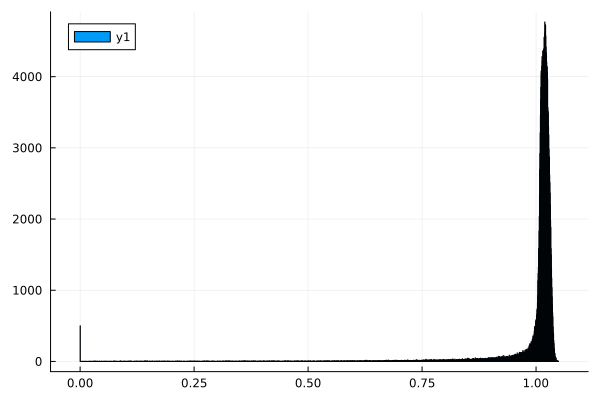

In [2]:
# Open the fragment of Hi-C matrix in Julia and build histogram of unique matrix values

using Plots
using Distributions
using NPZ

dist_matrix_fragment = npzread("../data/8B_test_fragment.npy");
histogram(vec(dist_matrix_fragment))

In [3]:
using Eirene

WebIO._IJuliaInit()

In [4]:
# Use Eirene to find homologies for the matrix
C = eirene(dist_matrix_fragment, model="vr", maxdim=2, maxrad=0.7)

Dict{String, Any} with 12 entries:
  "symmat"   => [1598 1242 … 0 0; 1242 1599 … 0 0; … ; 0 0 … 1599 0; 0 0 … 0 15…
  "maxnz"    => [0, 2079, 2929, 2377, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  492, 493, 494, 495, 496, 49…
  "cyclerep" => [Vector{Int64}[], [[31, 41], [5, 7], [118, 224], [182, 193], [3…
  "phi"      => [Int64[], [329, 54, 908, 1172, 404, 682, 184, 616, 103, 1166  ……
  "plo"      => [Int64[], [41, 7, 224, 193, 189, 158, 68, 67, 20, 219  …  438, …
  "ocg2rad"  => [0.699834, 0.699805, 0.699581, 0.699375, 0.699149, 0.699093, 0.…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  491, 492, 493, 494, 495, 49…
  "nvl2ovl"  => [20, 23, 22, 130, 390, 322, 389, 18, 149, 321  …  158, 445, 377…
  "input"    => Dict{String, Any}("genera"=>[0.0 0.158436 … 1.01431 1.01744; 0.…
  "tid"      => [Int64[], [41, 7, 224, 193, 189, 158, 68, 67, 20, 219  …  76, 9…
  "grain"    => [[1598, 1599, 1598, 1599, 1599, 1599, 1599, 1599, 1599, 1597  ……

In [6]:
barcode(C, dim=1)
# plotbarcode_pjs(C,dim=1)
# plotpersistencediagram_pjs(C,dim=1)

23×2 Matrix{Float64}:
 0.427338   0.448965
 0.554125   0.561323
 0.593903   0.597308
 0.48827    0.558547
 0.5834     0.62173
 0.586584   0.607755
 0.616202   0.673265
 0.616861   0.646479
 0.624851   0.660789
 0.626993   0.641027
 0.630806   0.690522
 0.63121    0.643306
 0.642185   0.659896
 0.693795  Inf
 0.689613  Inf
 0.687693  Inf
 0.684262  Inf
 0.664692  Inf
 0.656543  Inf
 0.643401  Inf
 0.633311  Inf
 0.618664  Inf
 0.602968  Inf

In [8]:
using DataFrames
using CSV

In [10]:
# Form DataFrame
df = DataFrame(Class = Int64[], Dim = Int64[], 
    Birth = Float64[], Death = Float64[], Lifetime = Float64[], 
    Numvert = Int64[], Range = Int64[],  Vertices = Array{Int64,1}[])

maxdim=2
for d in 1:maxdim
        bar = barcode(C, dim=d)
        dimsize = size(bar)[1]
        # N_cyclenumber = size(C["cyclerep"][d+2])[1]

        #  Dataframe: chr | class | dim | birth | death | lifetime | cycle rep
        # Chrs = [chr for i in 1:dimsize]
        # Segments = [segment for i in 1:dimsize]
        classes = [i for i in 1:dimsize]
        dims = [d for i in 1:dimsize]
        births = bar[:,1]
        deaths = bar[:,2]
        lifetimes = bar[:,2] - bar[:,1]
        # Extract only unique vertices of representative cycles
        unique_vertices = [sort(unique(vec(classrep(C, class=cl, dim=d)))) for cl in 1:dimsize]
        numvert = [size(u)[1] for u in unique_vertices]
        range = [maximum(u) - minimum(u) for u in unique_vertices]

        tmpdf = DataFrame(Class = classes, Dim = dims,
        Birth = births, Death = deaths, Lifetime = lifetimes,
        Numvert = numvert, Range=range, Vertices = unique_vertices)
        append!(df, tmpdf)
    end
# Save results to DataFrame
savename = "../results/example_result_tda.csv"
CSV.write(savename, df)
print("save file: $savename")

save file: ../results/example_result_tda.csv